# Links and Sources

### Energy Information Administration (EIA)
The U.S. Energy Information Administration (EIA) is a principal agency of the U.S. Federal Statistical System responsible for collecting, analyzing, and disseminating energy information. <br>
https://www.eia.gov/


### Electric Sales, Revenue, and Average Price
https://www.eia.gov/electricity/sales_revenue_price/index.php

### Retail Sales - All (Residential, Commercial, Industrial, Transportation)
https://www.eia.gov/electricity/sales_revenue_price/pdf/table_10.pdf <br>
Gives : City, State, #Customers, # MWhrs, # dollars, Average energy price

### Terminology

Difference between Privately owned utilities, Cooperatives, Municipalities : https://ceateam.com/whats-difference-privately-owned-utilities-cooperatives-municipalities/

# Plan 

1. Get demand data from for all the possible cities in US
2. Get demand data from all other sources (excluding cities) for each state
3. Get the average demand per sq.miles for each state using data from (2)
3. Find a way to see what cities are within a given distance 'd' from any given coordinates
4. The total demand at any given coordinate will be the sum of 
    1. The demand from all the cities included in distance 'd' around it
    2. **The total demand from all other sources calculated using (2)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast
import geopy.distance

%matplotlib notebook

# Loading data for entire US

In [ ]:
data = pd.read_excel('dataset_energy_demand.xlsx')
data.columns = data.iloc[1]
data.drop(data.index[0:2], inplace=True)
data.reset_index(drop=True,inplace=True)
data

# Extracting only California data
## Add columns to save (latitude, longitude)

In [ ]:
data_california = data.copy()
data_california = data_california[data_california['State']=='CA']
data_california.reset_index(drop=True,inplace=True)

data_california['Latitude'] =np.nan
data_california['Longitude']=np.nan
data_california

# Manually adding the latitude and longitudes for all Entities 

In [ ]:
c_data = {}
for name in data_california['Entity']:
    c_data[name]={'Latitude':'','Longitude':''}

# for name in data_california['Entity']:
#     print(f"c_data['{name}']['Latitude'], c_data['{name}']['Longitude'] = '','' ,")


c_data['Ahana Renewables, LLC']['Latitude'], c_data['Ahana Renewables, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Alameda Municipal Power']['Latitude'], c_data['Alameda Municipal Power']['Longitude'] = 37.77634429711531, -122.25240059975788 ,
c_data['Bear Valley Electric Service']['Latitude'], c_data['Bear Valley Electric Service']['Longitude'] = 34.24589054285114, -116.88573977074265 ,
c_data['City & County of San Francisco']['Latitude'], c_data['City & County of San Francisco']['Longitude'] = 37.7790262,-122.419906 ,
c_data['City of Anaheim - (CA)']['Latitude'], c_data['City of Anaheim - (CA)']['Longitude'] = 33.8347516,-117.911732 ,
c_data['City of Azusa']['Latitude'], c_data['City of Azusa']['Longitude'] = 34.1338751,-117.9056046,
c_data['City of Burbank Water and Power']['Latitude'], c_data['City of Burbank Water and Power']['Longitude'] = 34.1816482,-118.3258554 ,
c_data['City of Colton - (CA)']['Latitude'], c_data['City of Colton - (CA)']['Longitude'] = 34.0739016,-117.3136547 ,
c_data['City of Corona - (CA)']['Latitude'], c_data['City of Corona - (CA)']['Longitude'] = 33.8752945,-117.5664449 ,
c_data['City of Glendale - (CA)']['Latitude'], c_data['City of Glendale - (CA)']['Longitude'] = 34.1469416,-118.2478471 ,
c_data['City of Lodi - (CA)']['Latitude'], c_data['City of Lodi - (CA)']['Longitude'] = 38.124694250000005 , -121.2795345883064,
c_data['City of Moreno Valley - (CA)']['Latitude'], c_data['City of Moreno Valley - (CA)']['Longitude'] = 33.937517 , -117.2305944,
c_data['City of Palo Alto - (CA)']['Latitude'], c_data['City of Palo Alto - (CA)']['Longitude'] = 37.4443293 , -122.1598465,
c_data['City of Pasadena - (CA)']['Latitude'], c_data['City of Pasadena - (CA)']['Longitude'] = 34.1476452 , -118.1444779,
c_data['City of Redding - (CA)']['Latitude'], c_data['City of Redding - (CA)']['Longitude'] = 40.5863563 , -122.391675,
c_data['City of Riverside - (CA)']['Latitude'], c_data['City of Riverside - (CA)']['Longitude'] = 33.9533546 , -117.3961623,
c_data['City of Roseville - (CA)']['Latitude'], c_data['City of Roseville - (CA)']['Longitude'] = 38.7521235 , -121.2880059,
c_data['City of Santa Clara - (CA)']['Latitude'], c_data['City of Santa Clara - (CA)']['Longitude'] = 37.3541132 , -121.955174,
c_data['City of Vernon']['Latitude'], c_data['City of Vernon']['Longitude'] = 34.00254905983382, -118.22975143062526,
c_data['Constellation Solar Holding, LLC']['Latitude'], c_data['Constellation Solar Holding, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Greenbacker Renewable Energy Corporation']['Latitude'], c_data['Greenbacker Renewable Energy Corporation']['Longitude'] = np.nan,np.nan ,
c_data['Greenskies Renewable Energy, LLC']['Latitude'], c_data['Greenskies Renewable Energy, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Imperial Irrigation District']['Latitude'], c_data['Imperial Irrigation District']['Longitude'] = 32.84716294268047, -115.5670040955087 ,
c_data['Kings River Conservation Dist']['Latitude'], c_data['Kings River Conservation Dist']['Longitude'] = 36.70684730256173, -119.73276423107694 ,
c_data['Liberty Utilities']['Latitude'], c_data['Liberty Utilities']['Longitude'] = np.nan,np.nan ,
c_data['Longroad Energy']['Latitude'], c_data['Longroad Energy']['Longitude'] = np.nan,np.nan ,
c_data['Los Angeles Department of Water & Power']['Latitude'], c_data['Los Angeles Department of Water & Power']['Longitude'] = 34.0536909 , -118.242766,
c_data['Merced Irrigation District']['Latitude'], c_data['Merced Irrigation District']['Longitude'] = 37.3029568 , -120.4843269,
c_data['Modesto Irrigation District']['Latitude'], c_data['Modesto Irrigation District']['Longitude'] = 37.6390972 , -120.9968782,
c_data['PacifiCorp']['Latitude'], c_data['PacifiCorp']['Longitude'] = np.nan,np.nan ,
c_data['Pacific Gas & Electric Co.']['Latitude'], c_data['Pacific Gas & Electric Co.']['Longitude'] = np.nan,np.nan ,
c_data['Sacramento Municipal Util Dist']['Latitude'], c_data['Sacramento Municipal Util Dist']['Longitude'] = 38.5810606 , -121.493895,
c_data['San Diego Gas & Electric Co']['Latitude'], c_data['San Diego Gas & Electric Co']['Longitude'] = 32.7174202 , -117.1627728,
c_data['Scale Sustainable I, LLC']['Latitude'], c_data['Scale Sustainable I, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Southern California Edison Co']['Latitude'], c_data['Southern California Edison Co']['Longitude'] = np.nan,np.nan ,
c_data['Spruce Finance']['Latitude'], c_data['Spruce Finance']['Longitude'] = np.nan,np.nan ,
c_data['SunPower Capital, LLC']['Latitude'], c_data['SunPower Capital, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Sunnova']['Latitude'], c_data['Sunnova']['Longitude'] = np.nan,np.nan ,
c_data['Sunrun Inc.']['Latitude'], c_data['Sunrun Inc.']['Longitude'] = np.nan,np.nan ,
c_data['Surprise Valley Electrification']['Latitude'], c_data['Surprise Valley Electrification']['Longitude'] = np.nan,np.nan ,
c_data['TerraForm US Energy Services, LLC']['Latitude'], c_data['TerraForm US Energy Services, LLC']['Longitude'] = np.nan,np.nan ,
c_data['Tesla Inc.']['Latitude'], c_data['Tesla Inc.']['Longitude'] = np.nan,np.nan ,
c_data['Turlock Irrigation District']['Latitude'], c_data['Turlock Irrigation District']['Longitude'] = 37.4946568 , -120.8465941,
c_data['Valley Electric Assn, Inc']['Latitude'], c_data['Valley Electric Assn, Inc']['Longitude'] = np.nan,np.nan ,
c_data['WAPA-- Western Area Power Administration']['Latitude'], c_data['WAPA-- Western Area Power Administration']['Longitude'] = np.nan,np.nan 

# Add the latitude and longitude data to California data

In [ ]:
for entity in c_data:
    index = data_california.index[data_california['Entity']==entity]
    data_california.at[index[0],'Latitude'] =c_data[entity]['Latitude']
    data_california.at[index[0],'Longitude']=c_data[entity]['Longitude']
data_california

# Save California data with Latitude and Longitude

In [ ]:
data_california.to_csv('demand_data_california_with_lat_lon.csv')

# Function to get demand within a given distance

### Checks what entities in the data are within a given distance. Adds the demands from all these entities

### For entities whose coordinates are not present, the demand is equally distributed among all the other entities. This value is added to the demand

In [ ]:
# Distance in miles.Default value = 50 miles 
# Returns demand in Megawatthours
def get_demand_within_distance(latitude,longitude,demand_within_distance=50):
    coords_1 = (latitude,longitude)
    demand = 0.
    for ind, row in data_california.iterrows():
        lat = data_california.at[ind,'Latitude']
        lon = data_california.at[ind,'Longitude']
        if not (np.isnan(lat) and np.isnan(lon)):
            coords_2 = (lat,lon)
            d = geopy.distance.geodesic(coords_1, coords_2).miles
            if d<=demand_within_distance:
                demand += data_california.at[ind,'Sales (Megawatthours)']
                
    demand_from_unidentified_sources = np.sum(data_california[pd.isnull(data_california['Latitude'])]['Sales (Megawatthours)'])
    avg_demand_from_unidentified_sources = demand_from_unidentified_sources/len(data_california[pd.isnull(data_california['Latitude'])])
    
    demand += avg_demand_from_unidentified_sources
    return demand

# Example______________________________________________
lat,lon = 34.08029236093867, -118.27017871471111
dis = 50
print(get_demand_within_distance(lat,lon,dis))
#______________________________________________________

# Plotting how demand increases with increasing distance

In [ ]:
distance = np.arange(1,600,5)

lat,lon = 34.08029236093867, -118.27017871471111

demand = np.array([get_demand_within_distance(lat,lon,x) for x in distance])

plt.plot(distance[:600],demand[:600],'o', markersize='4')
plt.show()

# Update energy demand in California dataset

In [2]:
data = pd.read_csv('CA_Grid_dataframe_with_existing_solar_farms.csv')
data['demand_10km_MWh'] = np.nan
data['demand_20km_MWh'] = np.nan
data['demand_50km_MWh'] = np.nan
data

,Latitude,Longitude,State,panel.area,power,panels,landscape.area,water,urban,Address,demand_10km_MWh,demand_20km_MWh,demand_50km_MWh
0,47.020475,-120.223217,WA,0.000141,NaN,1.0,0.0,0.0,0.0,"2QCG+5P Renslow, WA, USA",NaN,NaN,NaN
1,44.582129,-123.286963,OR,0.000141,NaN,1.0,0.0,0.0,1.0,"3230 NW Garfield Ave, Corvallis, OR 97330, USA",NaN,NaN,NaN
2,37.405176,-122.084769,CA,0.000141,NaN,1.0,0.0,0.0,1.0,"1625 San Luis Ave, Mountain View, CA 94043, USA",NaN,NaN,NaN
3,37.847173,-122.271529,CA,0.000141,NaN,1.0,0.0,0.0,1.0,"3372 Martin Luther King Jr Way, Berkeley, CA 9...",NaN,NaN,NaN
4,37.154450,-121.560230,CA,0.000141,NaN,1.0,0.0,0.0,0.0,"16600 Finley Ridge Rd, Morgan Hill, CA 95037, USA",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,34.293795,-114.357804,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7987,34.392355,-114.357804,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7988,34.195234,-114.249069,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989,34.293795,-114.249069,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from utils import *#get_demand_within_distance
from tqdm import tqdm

for ind,row in tqdm(data.iterrows()):
    
    latitude  = data.at[ind,'Latitude']
    longitude = data.at[ind,'Longitude']
    unit = 'km'
    data.at[ind,'demand_10km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=10,unit=unit)
    data.at[ind,'demand_20km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=20,unit=unit)
    data.at[ind,'demand_50km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=50,unit=unit)    

7991it [03:36, 36.86it/s]


In [14]:
data.to_csv("CA_Grid_dataframe_with_existing_solar_farms.csv",index=False)

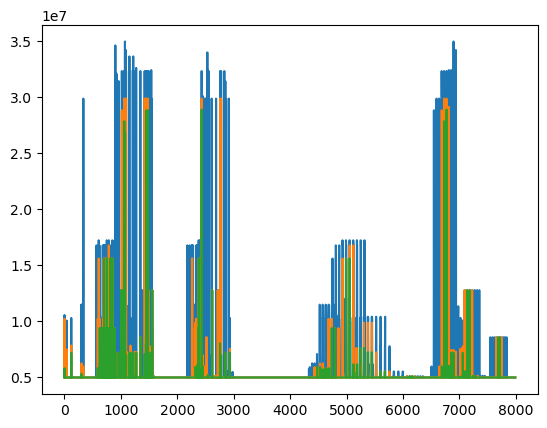

In [13]:
plt.plot(np.array(data['demand_50km_MWh']))
plt.plot(np.array(data['demand_20km_MWh']))
plt.plot(np.array(data['demand_10km_MWh']))

# #############################################################

# Adding demand values for new grid dataset

In [2]:
data = pd.read_csv('./../data/ca_data_version_5.csv')
data

,lat,lon,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,slope,land_cover,elevation,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
0,41.121933,-124.083541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,241.0,4.647099,"[74220.87028531785, 81853.14136114981, 113785....","[89.71184293662846, 99.27773039711408, 142.244...","[2.893930417310596, 3.54563322846836, 4.588518...","[78072.6330660135, 86028.3788149819, 119490.90...",1.351093e+06
1,34.571305,-120.610359,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0,244.0,5.449958,"[126910.2673240865, 120953.4951399055, 141626....","[157.4086237937431, 149.0061670892798, 176.243...","[5.07769754173365, 5.321648824617137, 5.685276...","[132842.0433185665, 126964.0270624705, 148524....",1.584719e+06
2,37.426206,-121.839995,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,359.0,5.776466,"[93296.39819471513, 94001.73832147277, 148309....","[115.084787852927, 118.3805626840665, 188.1425...","[3.712412511384743, 4.227877238716659, 6.06911...","[97913.03195989196, 98663.10917491073, 155325....",1.631746e+06
3,33.750032,-117.072459,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,607.0,6.246080,"[135309.814274307, 123283.186730356, 151155.07...","[170.4540593143596, 156.1909634208012, 197.380...","[5.498518042398696, 5.578248693600041, 6.36712...","[141635.9382116481, 129010.6773886973, 158297....",1.729305e+06
4,35.705444,-121.063383,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,506.0,6.172914,"[118738.5864463819, 113457.5578228151, 148653....","[145.3158467865841, 140.9581036133796, 186.941...","[4.687607960857552, 5.034217986192131, 6.03037...","[124417.4689334649, 118908.0059730483, 155818....",1.773539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.635821,-123.695234,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,0.0,241.0,5.284656,"[82206.5215781221, 79078.58223682463, 119457.0...","[101.4403464882599, 97.9490161792885, 151.1051...","[3.272269241556772, 3.498179149260304, 4.87436...","[86334.0767633393, 83172.89206218862, 125334.8...",1.497264e+06
996,41.063271,-121.192818,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,1447.0,5.759330,"[99114.67518039557, 102305.487932296, 138174.3...","[118.7602691333396, 124.2157409854216, 172.137...","[3.830976423656115, 4.436276463765057, 5.55283...","[103913.1240378555, 107965.9059896455, 145940....",1.632927e+06
997,38.579898,-120.545641,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,1021.0,5.939311,"[110443.9698609668, 99928.59308818416, 133367....","[136.2651011977622, 125.3747863465937, 169.904...","[4.395648425734264, 4.477670940949776, 5.48078...","[115801.7524074974, 104800.1668133905, 139813....",1.655084e+06
998,40.183336,-121.257536,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,1424.0,5.875154,"[99694.60795598329, 102037.4288268836, 150853....","[124.0439463477292, 129.623619731286, 198.3924...","[4.001417624120297, 4.629414990403072, 6.39975...","[104512.3474230356, 106988.9897269136, 157887....",1.582795e+06


<IPython.core.display.Javascript object>


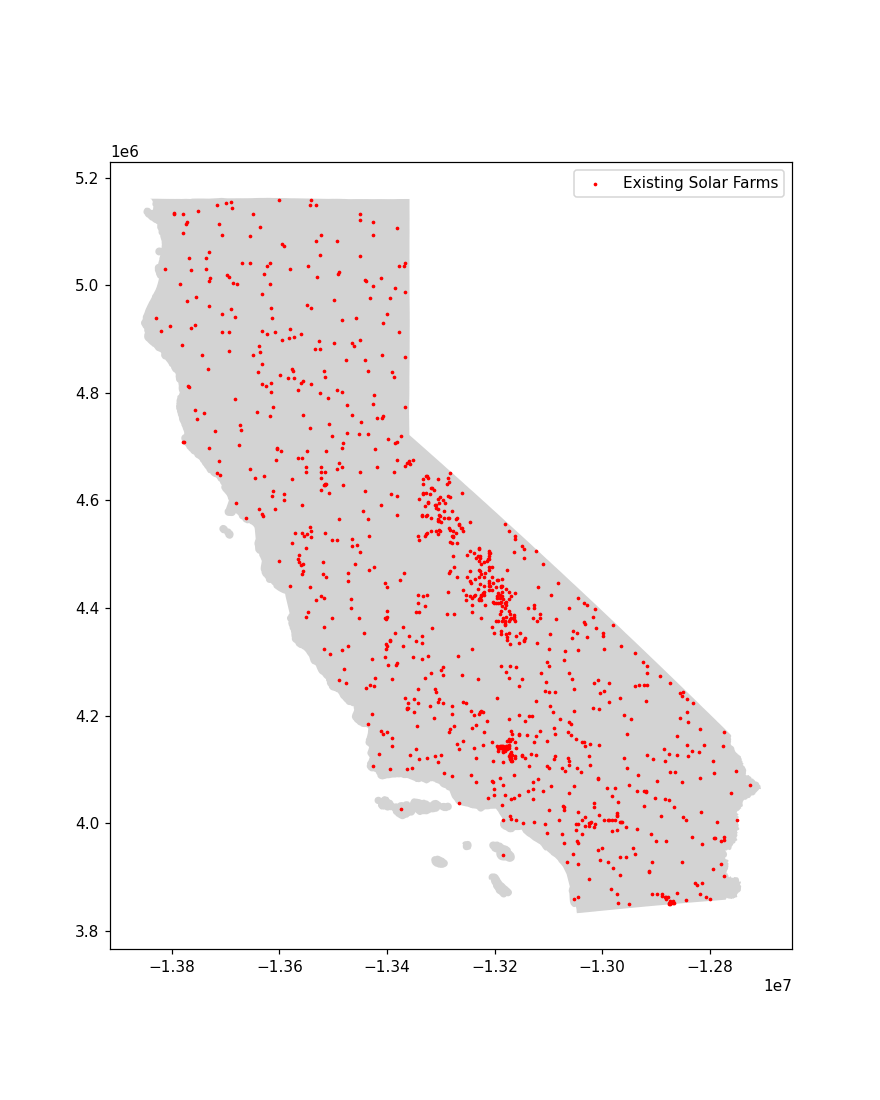

In [3]:
from pyproj import Proj, Transformer
import geopandas as gp

# Define the source and target EPSG codes
source_epsg = 'epsg:4326'  # WGS84
target_epsg = 'epsg:3857'  # Web Mercator

# Create Transformer
transformer = Transformer.from_crs(source_epsg, target_epsg)

shapfile_path = './../data/california/CA_State_TIGER2016.shp'
gdf = gp.read_file(shapfile_path)


# Transform the coordinates
solar_site_lat = np.array(data['lat'])
solar_site_lon = np.array(data['lon'])
solar_site_x, solar_site_y = transformer.transform(solar_site_lat, solar_site_lon)

fig, ax = plt.subplots(figsize=(8, 10))

# Plot the GeoDataFrame on the specified axis
gdf.plot(ax=ax,color='lightgray')

# Plot latitude and longitude points
plt.scatter(solar_site_x, solar_site_y, color='red', label='Existing Solar Farms',s=2)

# Show the plot
plt.legend()
# plt.savefig('all_solar_sites_and_grid.pdf')
plt.show()

In [4]:
data['demand_5km_MWh']  = 0.
data['demand_10km_MWh'] = 0.
data['demand_20km_MWh'] = 0.
data['demand_50km_MWh'] = 0.
data

,lat,lon,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,demand_5km_MWh,demand_10km_MWh,demand_20km_MWh,demand_50km_MWh
0,41.121933,-124.083541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,4.647099,"[74220.87028531785, 81853.14136114981, 113785....","[89.71184293662846, 99.27773039711408, 142.244...","[2.893930417310596, 3.54563322846836, 4.588518...","[78072.6330660135, 86028.3788149819, 119490.90...",1.351093e+06,0.0,0.0,0.0,0.0
1,34.571305,-120.610359,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.449958,"[126910.2673240865, 120953.4951399055, 141626....","[157.4086237937431, 149.0061670892798, 176.243...","[5.07769754173365, 5.321648824617137, 5.685276...","[132842.0433185665, 126964.0270624705, 148524....",1.584719e+06,0.0,0.0,0.0,0.0
2,37.426206,-121.839995,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.776466,"[93296.39819471513, 94001.73832147277, 148309....","[115.084787852927, 118.3805626840665, 188.1425...","[3.712412511384743, 4.227877238716659, 6.06911...","[97913.03195989196, 98663.10917491073, 155325....",1.631746e+06,0.0,0.0,0.0,0.0
3,33.750032,-117.072459,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.246080,"[135309.814274307, 123283.186730356, 151155.07...","[170.4540593143596, 156.1909634208012, 197.380...","[5.498518042398696, 5.578248693600041, 6.36712...","[141635.9382116481, 129010.6773886973, 158297....",1.729305e+06,0.0,0.0,0.0,0.0
4,35.705444,-121.063383,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.172914,"[118738.5864463819, 113457.5578228151, 148653....","[145.3158467865841, 140.9581036133796, 186.941...","[4.687607960857552, 5.034217986192131, 6.03037...","[124417.4689334649, 118908.0059730483, 155818....",1.773539e+06,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.635821,-123.695234,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.284656,"[82206.5215781221, 79078.58223682463, 119457.0...","[101.4403464882599, 97.9490161792885, 151.1051...","[3.272269241556772, 3.498179149260304, 4.87436...","[86334.0767633393, 83172.89206218862, 125334.8...",1.497264e+06,0.0,0.0,0.0,0.0
996,41.063271,-121.192818,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.759330,"[99114.67518039557, 102305.487932296, 138174.3...","[118.7602691333396, 124.2157409854216, 172.137...","[3.830976423656115, 4.436276463765057, 5.55283...","[103913.1240378555, 107965.9059896455, 145940....",1.632927e+06,0.0,0.0,0.0,0.0
997,38.579898,-120.545641,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.939311,"[110443.9698609668, 99928.59308818416, 133367....","[136.2651011977622, 125.3747863465937, 169.904...","[4.395648425734264, 4.477670940949776, 5.48078...","[115801.7524074974, 104800.1668133905, 139813....",1.655084e+06,0.0,0.0,0.0,0.0
998,40.183336,-121.257536,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.875154,"[99694.60795598329, 102037.4288268836, 150853....","[124.0439463477292, 129.623619731286, 198.3924...","[4.001417624120297, 4.629414990403072, 6.39975...","[104512.3474230356, 106988.9897269136, 157887....",1.582795e+06,0.0,0.0,0.0,0.0


In [5]:
demand_data = pd.read_csv('./../data/demand_data_california_with_lat_lon.csv')
demand_data = demand_data.drop(columns='Unnamed: 0').reset_index(drop=True)
demand_data

,Entity,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh),Latitude,Longitude
0,"Ahana Renewables, LLC",CA,NaN,25,10720,2483.0,23.162313,NaN,NaN
1,Alameda Municipal Power,CA,Municipal,36377,334047,63740.4,19.081267,37.776344,-122.252401
2,Bear Valley Electric Service,CA,Investor Owned,24678,142433,39917.7,28.025598,34.245891,-116.885740
3,City & County of San Francisco,CA,Municipal,1992,927238,154048.0,16.613642,37.779026,-122.419906
4,City of Anaheim - (CA),CA,Municipal,122391,2221927,347824.0,15.654160,33.834752,-117.911732
5,City of Azusa,CA,Municipal,16967,237344,38571.0,16.251095,34.133875,-117.905605
6,City of Burbank Water and Power,CA,Municipal,53252,978966,154304.0,15.761937,34.181648,-118.325855
7,City of Colton - (CA),CA,Municipal,20330,353743,58223.0,16.459124,34.073902,-117.313655
8,City of Corona - (CA),CA,Municipal,1840,82794,11268.2,13.609923,33.875295,-117.566445
9,City of Glendale - (CA),CA,Municipal,90283,1027035,214332.2,20.869026,34.146942,-118.247847


<IPython.core.display.Javascript object>


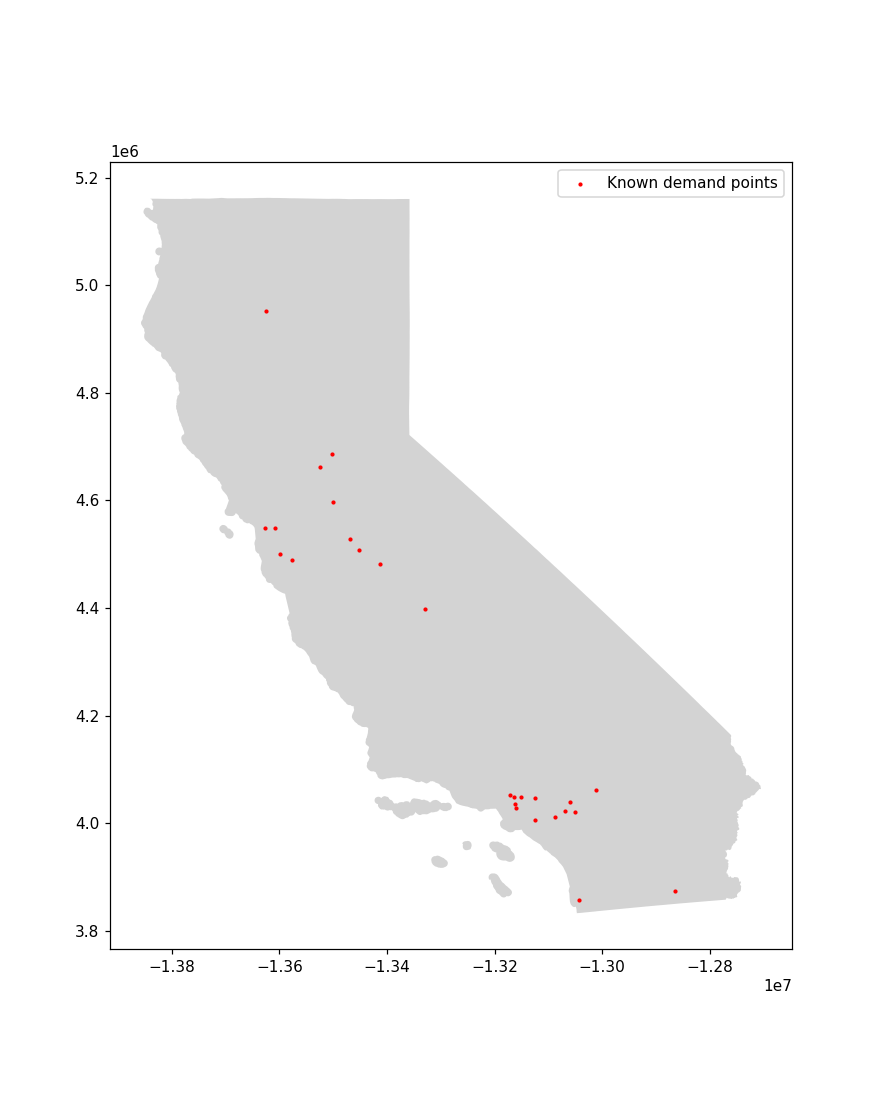

In [9]:
# Transform the coordinates
demand_lat = np.array(demand_data['Latitude'])
demand_lon = np.array(demand_data['Longitude'])
demand_x, demand_y = transformer.transform(demand_lat, demand_lon)

fig, ax = plt.subplots(figsize=(8, 10))

# Plot the GeoDataFrame on the specified axis
gdf.plot(ax=ax,color='lightgray')

# Plot latitude and longitude points
plt.scatter(demand_x, demand_y, color='red', label='Known demand points',s=3)

# Show the plot
plt.legend()
plt.savefig('demand_data_from_known_sources.png')
plt.show()

In [35]:
def get_demand_within_distance(latitude,longitude,demand_within_distance,unit):
    data_california = pd.read_csv('./../data/demand_data_california_with_lat_lon.csv')
    coords_1 = (latitude,longitude)
    demand = 0.
    for ind, row in data_california.iterrows():
        lat = data_california.at[ind,'Latitude']
        lon = data_california.at[ind,'Longitude']
        if not (np.isnan(lat) and np.isnan(lon)):
            coords_2 = (lat,lon)
            if unit=='mile':
            	d = geopy.distance.geodesic(coords_1, coords_2).miles
            elif unit=='km':
            	d = geopy.distance.geodesic(coords_1, coords_2).km
            	
            if d<=demand_within_distance:
                demand += data_california.at[ind,'Sales (Megawatthours)']
                
    return demand

In [36]:
from tqdm import tqdm

for ind,row in tqdm(data.iterrows()):
    
    latitude  = data.at[ind,'lat']
    longitude = data.at[ind,'lon']
    unit = 'km'
    data.at[ind,'demand_5km_MWh']  = get_demand_within_distance(latitude,longitude,demand_within_distance=5 ,unit=unit)
    data.at[ind,'demand_10km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=10,unit=unit)
    data.at[ind,'demand_20km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=20,unit=unit)
    data.at[ind,'demand_50km_MWh'] = get_demand_within_distance(latitude,longitude,demand_within_distance=50,unit=unit)    

1000it [00:33, 29.76it/s]


In [37]:
data

,lat,lon,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,demand_5km_MWh,demand_10km_MWh,demand_20km_MWh,demand_50km_MWh
0,41.121933,-124.083541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,4.647099,"[74220.87028531785, 81853.14136114981, 113785....","[89.71184293662846, 99.27773039711408, 142.244...","[2.893930417310596, 3.54563322846836, 4.588518...","[78072.6330660135, 86028.3788149819, 119490.90...",1.351093e+06,0.0,0.0,0.0,0.0
1,34.571305,-120.610359,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.449958,"[126910.2673240865, 120953.4951399055, 141626....","[157.4086237937431, 149.0061670892798, 176.243...","[5.07769754173365, 5.321648824617137, 5.685276...","[132842.0433185665, 126964.0270624705, 148524....",1.584719e+06,0.0,0.0,0.0,0.0
2,37.426206,-121.839995,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.776466,"[93296.39819471513, 94001.73832147277, 148309....","[115.084787852927, 118.3805626840665, 188.1425...","[3.712412511384743, 4.227877238716659, 6.06911...","[97913.03195989196, 98663.10917491073, 155325....",1.631746e+06,0.0,0.0,4414158.0,5241628.0
3,33.750032,-117.072459,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.246080,"[135309.814274307, 123283.186730356, 151155.07...","[170.4540593143596, 156.1909634208012, 197.380...","[5.498518042398696, 5.578248693600041, 6.36712...","[141635.9382116481, 129010.6773886973, 158297....",1.729305e+06,0.0,0.0,0.0,2857331.0
4,35.705444,-121.063383,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.172914,"[118738.5864463819, 113457.5578228151, 148653....","[145.3158467865841, 140.9581036133796, 186.941...","[4.687607960857552, 5.034217986192131, 6.03037...","[124417.4689334649, 118908.0059730483, 155818....",1.773539e+06,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.635821,-123.695234,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.284656,"[82206.5215781221, 79078.58223682463, 119457.0...","[101.4403464882599, 97.9490161792885, 151.1051...","[3.272269241556772, 3.498179149260304, 4.87436...","[86334.0767633393, 83172.89206218862, 125334.8...",1.497264e+06,0.0,0.0,0.0,0.0
996,41.063271,-121.192818,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.759330,"[99114.67518039557, 102305.487932296, 138174.3...","[118.7602691333396, 124.2157409854216, 172.137...","[3.830976423656115, 4.436276463765057, 5.55283...","[103913.1240378555, 107965.9059896455, 145940....",1.632927e+06,0.0,0.0,0.0,0.0
997,38.579898,-120.545641,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.939311,"[110443.9698609668, 99928.59308818416, 133367....","[136.2651011977622, 125.3747863465937, 169.904...","[4.395648425734264, 4.477670940949776, 5.48078...","[115801.7524074974, 104800.1668133905, 139813....",1.655084e+06,0.0,0.0,0.0,0.0
998,40.183336,-121.257536,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.875154,"[99694.60795598329, 102037.4288268836, 150853....","[124.0439463477292, 129.623619731286, 198.3924...","[4.001417624120297, 4.629414990403072, 6.39975...","[104512.3474230356, 106988.9897269136, 157887....",1.582795e+06,0.0,0.0,0.0,0.0


In [38]:
data.to_csv("ca_data_version_6.csv",index=False)

# ---------------------------- Extra ---------------------------------------

# How to get latitudes and longitudes for any city

In [ ]:
import requests

city = 'Turlock'
country = 'USA'
state = 'California'
api_url = 'https://api.api-ninjas.com/v1/geocoding?city={}&country={}&state={}'.format(city,country,state)
response = requests.get(api_url + city, headers={'X-Api-Key': 'MUFmQYBgNJyE/VmlfN+wNA==aPmARELVzoFWzbT0'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)
    
res = json.loads(response.text)
a = ast.literal_eval(str(res[0]))
print(a)
print()
print(a['latitude'],',', a['longitude'])